In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
dfBank = pd.read_csv("/content/drive/MyDrive/LablFiles/Churn.csv")

In [4]:
dfBank.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
dfBank.shape

(10000, 14)

In [6]:
#Lets drop unwamted columns - CustomerId, Surname
dfBank.drop(columns=['CustomerId','Surname'], inplace=True)

In [7]:
dfBank.drop(columns=['RowNumber'], inplace=True)

In [8]:
dfBank.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [9]:
#dfBank['Geography'].value_counts()
dfBank['Exited'].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [10]:
#Lets do encoding....
dfBank = pd.get_dummies(dfBank, columns=["Geography", "Gender","HasCrCard","IsActiveMember"])

In [11]:
dfBank.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,HasCrCard_0,HasCrCard_1,IsActiveMember_0,IsActiveMember_1
0,619,42,2,0.00,1,101348.88,1,1,0,0,1,0,0,1,0,1
1,608,41,1,83807.86,1,112542.58,0,0,0,1,1,0,1,0,0,1
2,502,42,8,159660.80,3,113931.57,1,1,0,0,1,0,0,1,1,0
3,699,39,1,0.00,2,93826.63,0,1,0,0,1,0,1,0,1,0
4,850,43,2,125510.82,1,79084.10,0,0,0,1,1,0,0,1,0,1


In [12]:
# Create input attribute set by dropping
X  = dfBank.drop("Exited",axis=1)

In [13]:
X.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
EstimatedSalary      float64
Geography_France       uint8
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Female          uint8
Gender_Male            uint8
HasCrCard_0            uint8
HasCrCard_1            uint8
IsActiveMember_0       uint8
IsActiveMember_1       uint8
dtype: object

In [14]:
# Labels
y = dfBank.pop("Exited")

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
# Split the data up in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [17]:
#Lets standardize the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [18]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import ReLU

In [35]:
# define the model architecture

# Initialize the constructor
model = Sequential()
# Add an input layer 
model.add(Dense(25, activation='relu'))

model.add(Dense(25, activation='relu'))

model.add(Dense(25, activation='relu'))

# Add an output layer 
model.add(Dense(1, activation='sigmoid'))

In [36]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   

epochs = 50
batch_size = 500


history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=.3, verbose=True)
loss,accuracy  = model.evaluate(X_test, y_test, verbose=False)

Epoch 1/50
10/10 [==============================] - 1s 21ms/step - loss: 0.7819 - accuracy: 0.2947 - val_loss: 0.6849 - val_accuracy: 0.5762
Epoch 2/50
10/10 [==============================] - 0s 6ms/step - loss: 0.6598 - accuracy: 0.6412 - val_loss: 0.6019 - val_accuracy: 0.7700
Epoch 3/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5861 - accuracy: 0.7804 - val_loss: 0.5521 - val_accuracy: 0.7952
Epoch 4/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5484 - accuracy: 0.7962 - val_loss: 0.5196 - val_accuracy: 0.7948
Epoch 5/50
10/10 [==============================] - 0s 6ms/step - loss: 0.5152 - accuracy: 0.7957 - val_loss: 0.4946 - val_accuracy: 0.7948
Epoch 6/50
10/10 [==============================] - 0s 5ms/step - loss: 0.4964 - accuracy: 0.7939 - val_loss: 0.4753 - val_accuracy: 0.7948
Epoch 7/50
10/10 [==============================] - 0s 6ms/step - loss: 0.4955 - accuracy: 0.7836 - val_loss: 0.4604 - val_accuracy: 0.7948
Epoch 8/50
10/10 [=

[0.5761904716491699, 0.7699999809265137, 0.7952380776405334, 0.7947618961334229, 0.7947618961334229, 0.7947618961334229, 0.7947618961334229, 0.7947618961334229, 0.7947618961334229, 0.8014285564422607, 0.8095238208770752, 0.811904788017273, 0.8180952668190002, 0.8223809599876404, 0.8261904716491699, 0.8257142901420593, 0.8257142901420593, 0.8276190757751465, 0.8276190757751465, 0.8304761648178101, 0.8299999833106995, 0.831428587436676, 0.8323809504508972, 0.8328571319580078, 0.8333333134651184, 0.833809494972229, 0.8333333134651184, 0.8333333134651184, 0.8357142806053162, 0.8361904621124268, 0.833809494972229, 0.8352380990982056, 0.8342857360839844, 0.8390476107597351, 0.8419047594070435, 0.8428571224212646, 0.8428571224212646, 0.8442857265472412, 0.8476190567016602, 0.8471428751945496, 0.8471428751945496, 0.8476190567016602, 0.8471428751945496, 0.8485714197158813, 0.8495237827301025, 0.8490476012229919, 0.8490476012229919, 0.8500000238418579, 0.8480952382087708, 0.8471428751945496]
[0.

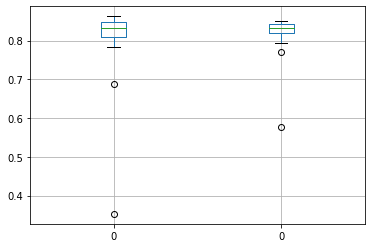

In [37]:
print(history.history['val_accuracy'])

print(history.history['accuracy'])

ta = pd.DataFrame(history.history['accuracy'])
va = pd.DataFrame(history.history['val_accuracy'])

tva = pd.concat([ta,va] , axis=1)

tva.boxplot()

In [38]:
y_pred = np.round(model.predict(X_test))

In [39]:
loss, acc = model.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)


loss, acc = model.evaluate(X_train, y_train, verbose=0)
print('Test Accuracy: %.3f' % acc)

Test Accuracy: 0.864
Test Accuracy: 0.857


In [42]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1])

array([[2319,   97],
       [ 312,  272]])

In [44]:
print(pd.DataFrame(metrics.confusion_matrix(y_test, y_pred, labels=[0 ,1]), index=['true:NotExited', 'true:Exited'], columns=['pred:NotExited', 'pred:Exited']))

                pred:NotExited  pred:Exited
true:NotExited            2319           97
true:Exited                312          272
